<a href="https://colab.research.google.com/github/saraygarciag/Tareas_Saray_Garcia/blob/main/Participaci%C3%B3n_Mineria_09_oct_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Partcicpación minería de datos en python.**
*Saray Daniella García Gelves.*

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

plt.style.use('ggplot')

In [2]:
urlDataset = 'https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/houses_prices_prediction.csv.zip'
data = pd.read_csv(urlDataset)
data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
# Crear variable area^2
data['area2'] = data['area'] ** 2

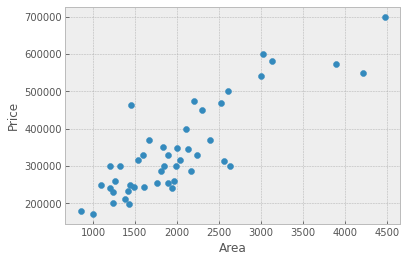

In [4]:
plt.style.use('bmh')
y = data[' price'].values
X = data['area'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [5]:
# Crear variables para el modelo
y = data[' price'].values
X = data[['area','area2']].values

# Estandarizar variables

from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))

In [6]:
### Escoger los modelos a comparar
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()
clf2 = SGDRegressor( max_iter=10000,tol=None)

In [7]:
#Estimar los modelos
clf1.fit(X, y)
clf2.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [13]:
# Calcular los y estimados (gorrito) con la regresión 
y_pred_reg1 = clf1.predict(X)
y_pred_reg2 = clf2.predict(X)

y_pred_reg1
y_pred_reg2

array([355052.84458638, 286578.55053702, 395022.68652445, 261448.90564373,
       475485.92152588, 338932.7469312 , 277572.72108278, 262953.192034  ,
       256524.03438765, 272110.25186848, 332829.26928061, 340966.30748105,
       326042.70855591, 670513.20402472, 241185.04732684, 381539.65844179,
       248309.95082532, 236797.7077534 , 423135.3379791 , 479622.93215788,
       309325.73357831, 325771.1384291 , 287124.06842707, 335813.71567887,
       593466.46937999, 218127.85418421, 267191.19629456, 411981.81341768,
       368035.91924033, 426894.75426304, 319115.08246807, 204375.58155729,
       346386.85739092, 493753.80113688, 315309.3892603 , 264320.50764931,
       237209.11093178, 358841.54639229, 636140.33855714, 362899.06788843,
       295302.86024298, 373169.77990668, 417493.16901872, 231859.41569235,
       183984.20902423, 320881.45950608, 232271.04255081])

In [9]:
X_ = pd.DataFrame(X, columns = ['area_1','area_2'])
X_.head()

,area_1,area_2
0,0.131415,-0.047860
1,-0.509641,-0.508354
2,0.507909,0.281001
3,-0.743677,-0.645244
4,1.271071,1.080222


In [10]:
# Calcular el mse para cada uno de los modelos
from sklearn import metrics
import numpy as np
print('MSE regresión lineal:', metrics.mean_squared_error(data[' price'], y_pred_reg1))
print('MSE regresión SGD:', metrics.mean_squared_error(data[' price'], y_pred_reg2))

MSE regresión lineal: 4115290102.0599403
MSE regresión SGD: 4115298050.566722


In [14]:
# Separar entre entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31, 2) (16, 2) (31,) (16,)


In [15]:
#Estimar los modelos con el conjunto de entrenamiento
clf1_tt = LinearRegression()
clf1_tt.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Calcular los y estimados (gorrito) con el conjunto de validación
y_pred_tt = clf1.predict(X_test)

In [17]:
# Calcular el mse para TEST,el modelo, de este sí nos podemos fiar porque estos que predijo con esos que vio contra los que no ha visto.
print('MSE regresión líneal:', metrics.mean_squared_error(y_test, y_pred_tt))

MSE regresión SGD: 5923570564.699193


## EJERCICIO DE PARTICIPACIÓN: Calcular el error de entrenamiento

In [21]:
# Calcular los y estimados (gorrito) con el conjunto de entrenamiento
y_pred_tt2 = clf1.predict(X_train)

In [22]:
# Calcular el mse para TRAIN:
print('MSE regresión líneal:', metrics.mean_squared_error(y_train, y_pred_tt2))

MSE regresión líneal: 3181984056.8267765
